<a href="https://colab.research.google.com/github/dayaYanez/MLTSA25_DYanez/blob/main/HW7/clustering_businesstimeseries_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series clustering exercise

# Data

The data is on the github repo. It can also be gotten directly from the Census Boureau and from NYC open data.

Each file is the economic census for 1 year.
Download it programmatically and move it to PUIdata

data link https://github.com/fedhere/MLTSA_FBianco/blob/main/data/nyc_zpb_est_1994_2014.csv



make sure yuo read it so that the index column is the zipcode

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
from sklearn.cluster import KMeans
import missingno as mno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
# read in the business data: this is the number of licenced business per zipcode in NYC from 1994 through 2014
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/nyc_zpb_est_1994_2014.csv",index_col=0)
df.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
11436,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,57.0,99.0,109.0
11213,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,493.0,755.0,772.0
11212,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,527.0,731.0,752.0
11225,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,422.0,673.0,696.0
11218,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1180.0,1687.0,1736.0


# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check. you should have 21(N_timestamps) datapoints per time series and about 239 zipcodes (Nzipcodes)

- drop all rows with 10 missing values or more
- impute missing values using k nearest neighbors with k=5 (you can use AI prompts to do that)


mydata.shape should be (Nzipcodes, Ntimestamps)



In [ ]:
df.shape

(248, 21)

<Axes: >

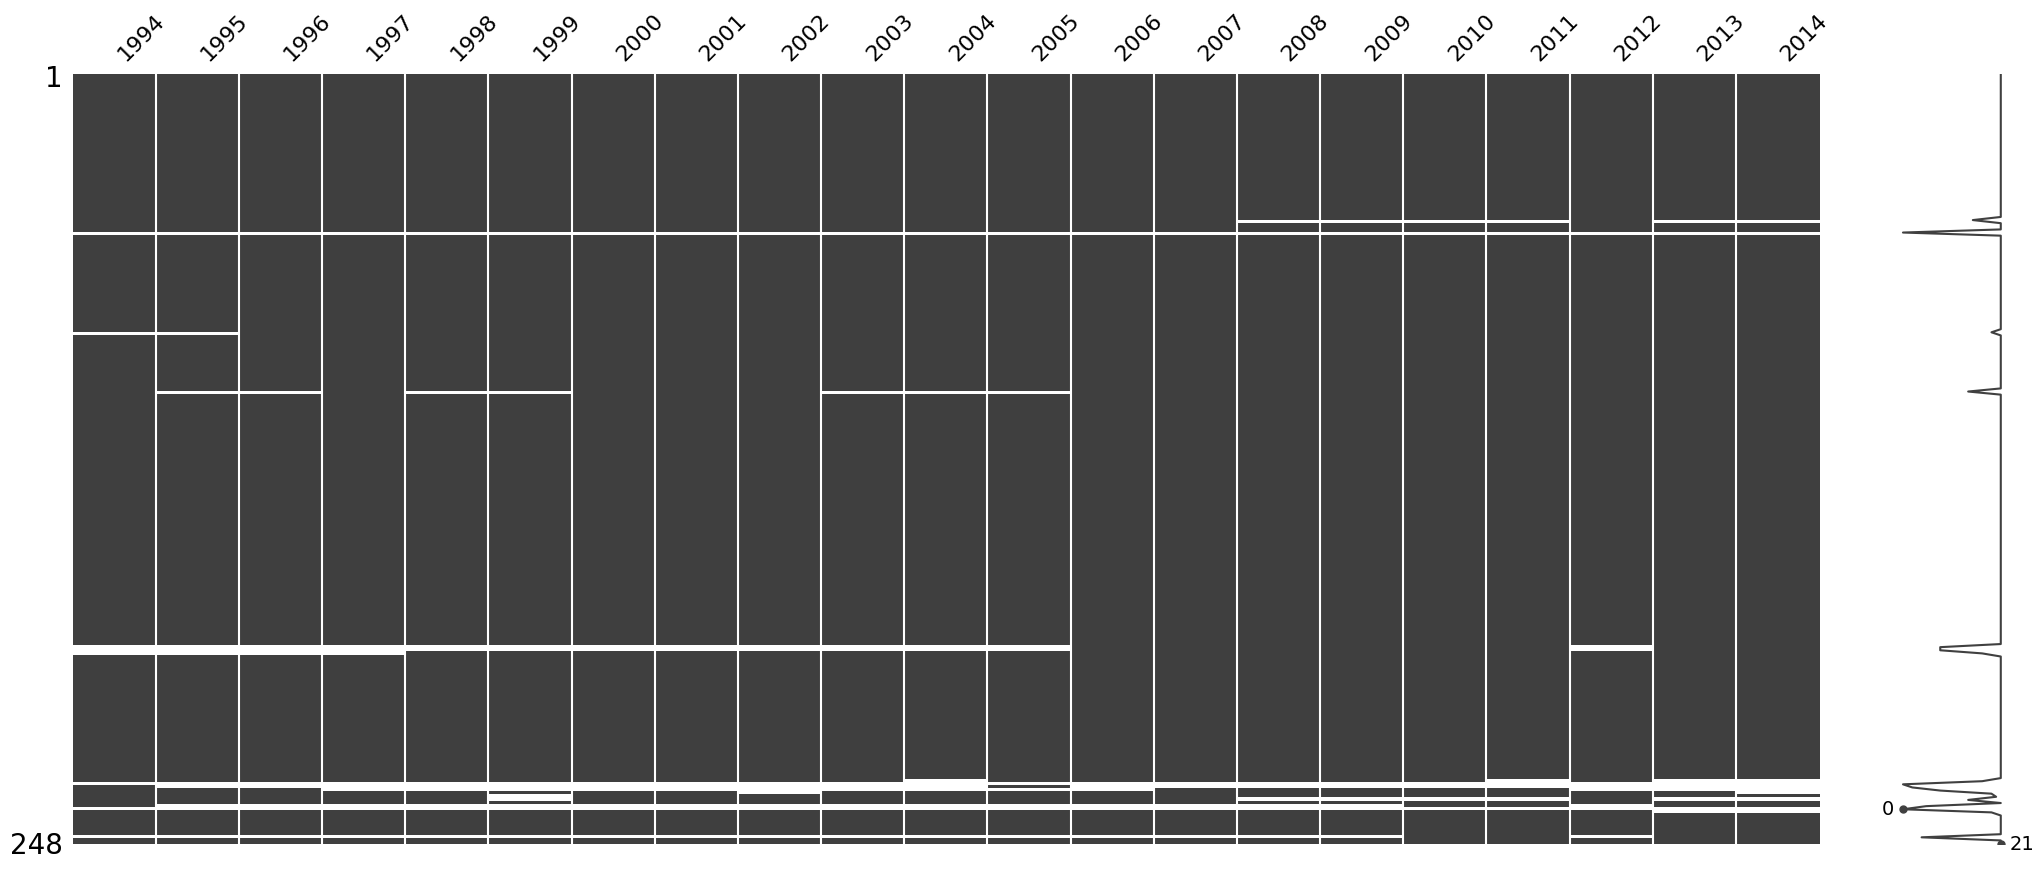

In [ ]:
mno.matrix(df)

**Figure 1:** Missing data matrix for the 1994–2014 dataset df. A year is represented by each vertical column, and one of 248 things (such as companies, goods, or series) is represented by each horizontal row. White gaps draw attention to missing entries, whereas dark gray blocks provide accessible data. Sparse missing values mostly occur in the early years (1994–2003), however most entities have complete data coverage from 1994 onward. After 2004, the availability of data significantly increases and stabilizes. A tiny percentage of entities have significant missing data for almost the whole period, especially those in the bottom 10–20 rows. From roughly 21 missing entries in the bottom rows to zero missing entries for the bulk of entities, the marginal plot on the right shows a dramatic drop in missing values.

CAPTION: what do you see in this missing data visualization?

In [ ]:
df.dropna(thresh=10,inplace=True)
df.shape

(239, 21)

<Axes: >

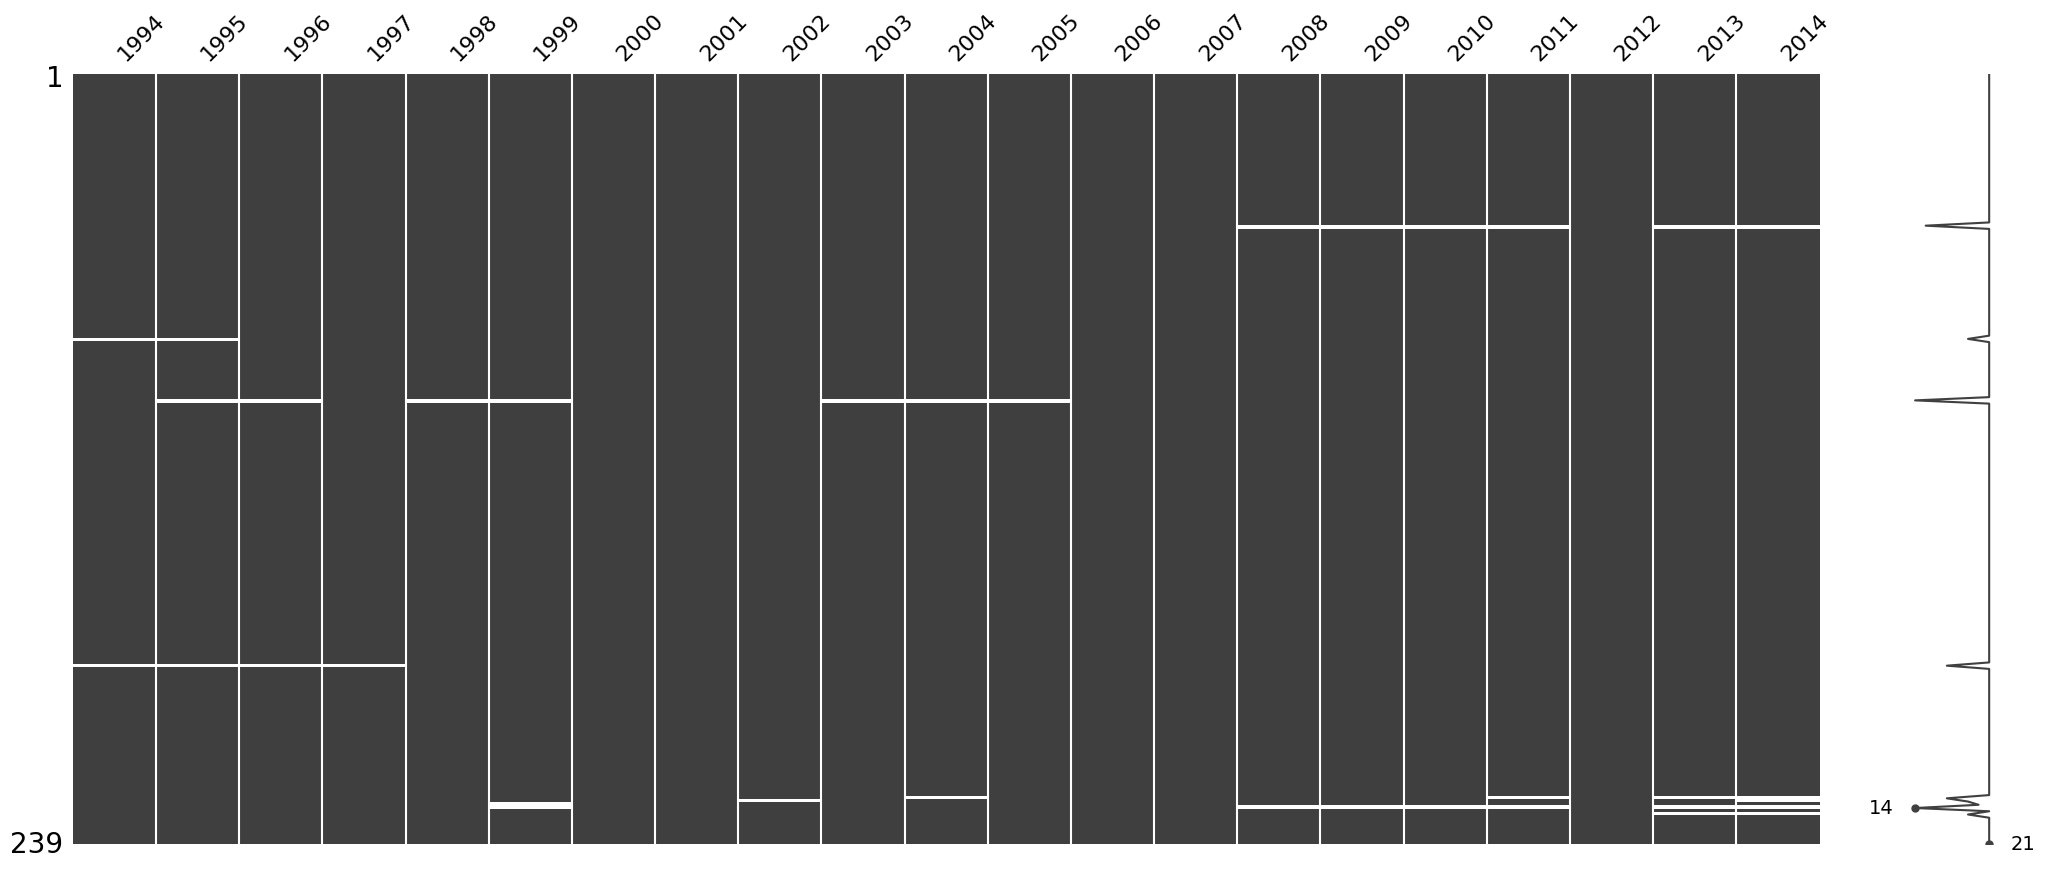

In [ ]:
mno.matrix(df)

**Figure 2:** The dataset df's missing data matrix, which has 239 entities (rows) spanning the years 1994 to 2014, has a vertical bar for each year. White gaps show missing data points, while dark gray blocks show accessible data. The majority of entities show full data coverage for the whole time frame. The majority of missing data occurs between 1994 and 1996, with occasional occurrences between 2007 and 2012. The missingness distribution is noticeably sparser, affecting fewer rows than in the preceding image. As can be seen from the marginal plot on the right, missing values mostly affect a limited subset of series and peak between 14 and 21 entries.




CAPTION

In [ ]:
# prompt: impute missing values with knearest neighbors

# Initialize KNN imputer with k=5
imputer = KNNImputer(n_neighbors=5)
# Fit and transform the data to impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns = df.columns, index=df.index)

In [ ]:
df_imputed.shape

(239, 21)

<Axes: >

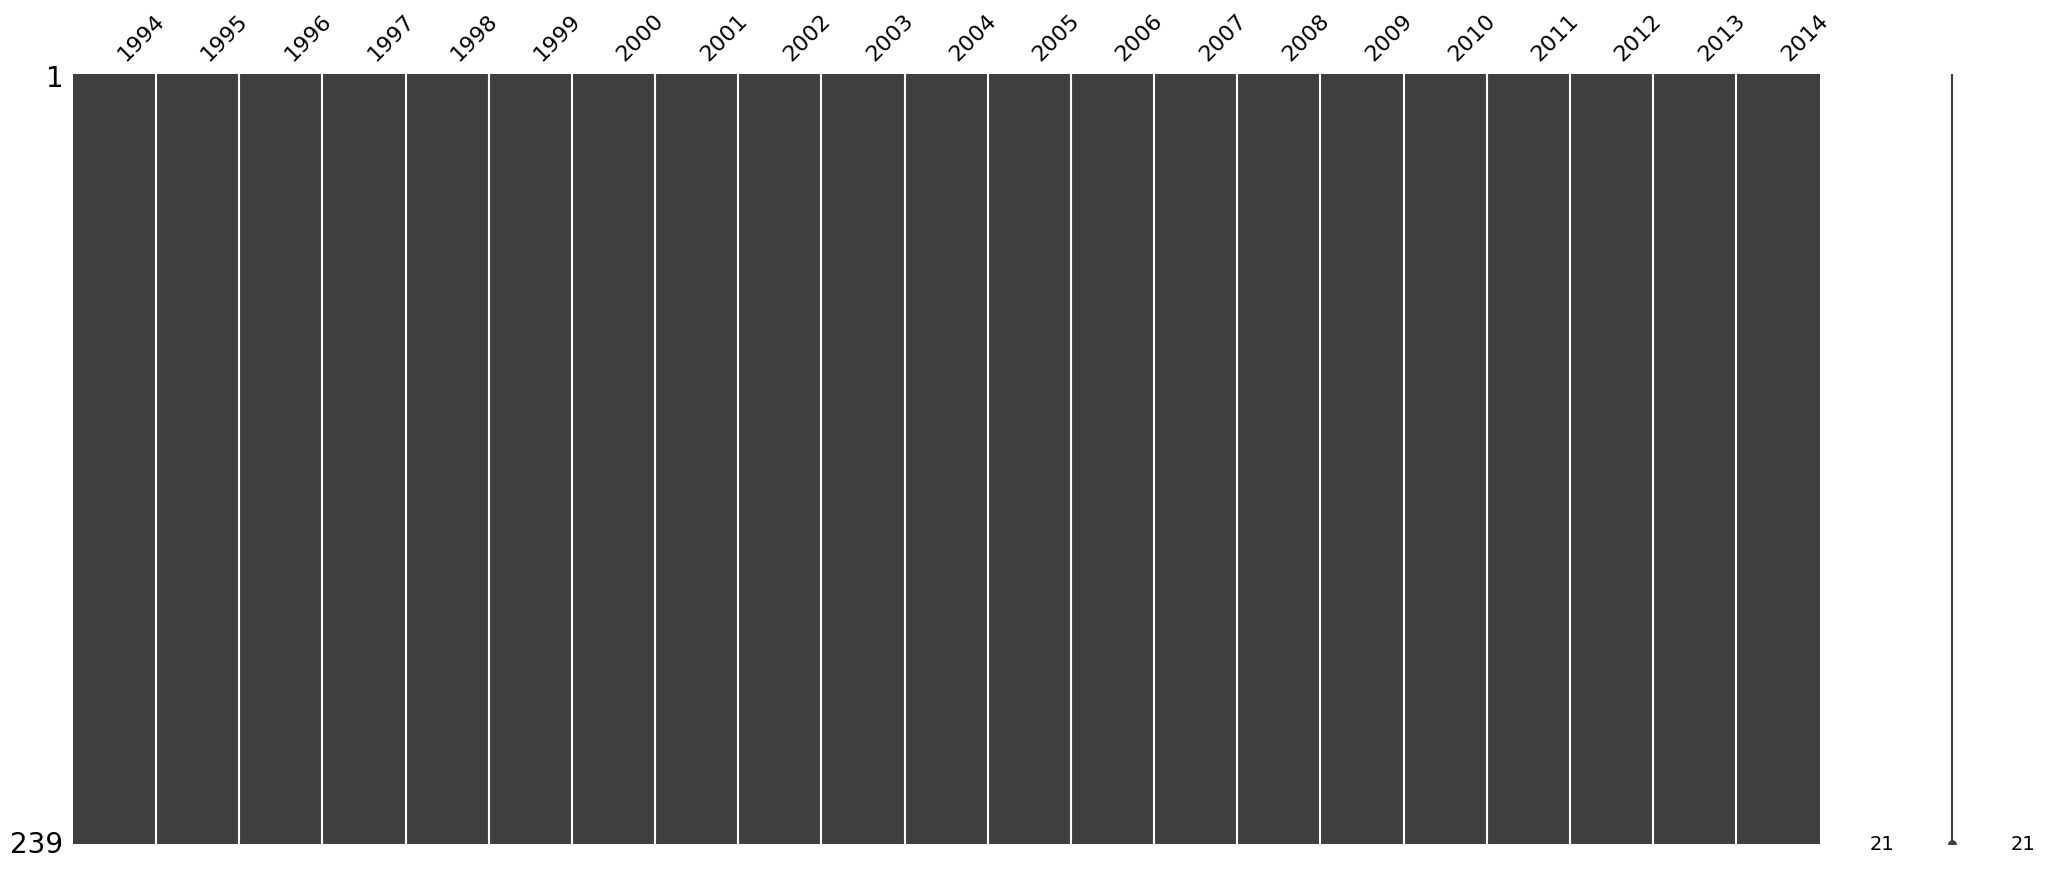

In [ ]:
mno.matrix(df_imputed)

**Figure 3:** Missing data matrix for the dataset df_imputed, spanning the period from 1994 to 2014 and comprising 239 entities (rows). All entries are shown in dark gray, indicating that no missing values remain across the entire dataset following imputation. There are zero missing values for all years and entities, as confirmed by the marginal plot on the right, which displays a flat vertical line corresponding to 21 available data points per entity. Compared to previous figures, the dataset has been fully imputed and is now ready for downstream analysis without the need for further missing data handling.

CAPTION

# get the zipcodes shape file
by cloning the repo https://github.com/wimlds/smart_cities.git


In [ ]:
!git clone 'https://github.com/wimlds/smart_cities.git'

Cloning into 'smart_cities'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156 (from 1)
Receiving objects: 100% (156/156), 15.70 MiB | 25.05 MiB/s, done.
Resolving deltas: 100% (54/54), done.


original data (263, 13)
after cleaning (248, 13)
ZIPCODES: 248 POLYGONS: 248 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 248


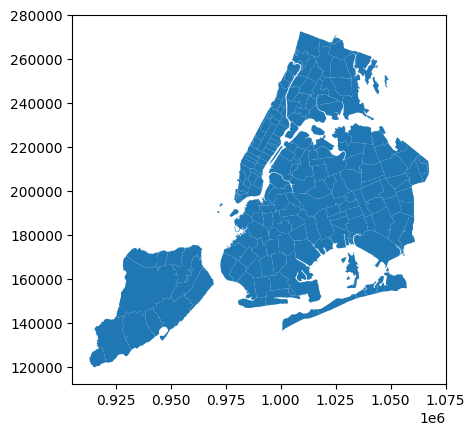

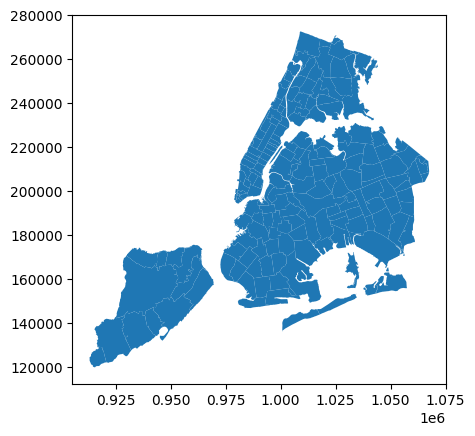

In [ ]:
#look at the code and the plots below : I am using geopandas to plot maps of zipcodes from a shapefile and I am removing duplicate entries that have the same zipcode

nyczipsshp = gp.read_file( "smart_cities/NYC_shapefiles/ZIP_CODE_040114.zip")
print("original data", nyczipsshp.shape)
nyczipsshp.plot()

nyczipsshp = nyczipsshp.drop_duplicates("ZIPCODE")
print("after cleaning", nyczipsshp.shape)
nyczipsshp.plot()

print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

**Figure 4:** New York City ZIP code boundaries were cleaned using the "ZIP_CODE_040114.zip" shapefile. The cleaned dataset comprises 248 distinct ZIP codes (shape = (248, 13)) after duplicates were eliminated using the ZIPCODE field. The original shapefile included 263 polygons spread across 13 attributes (shape = (263, 13)). Though occasionally a single ZIP code maps to several discrete geographic forms (such as distinct land parcels or islands), each ZIP code relates to a polygon. Staten Island, Brooklyn, Queens, Manhattan, and the Bronx are the five boroughs of New York City that are represented on the final map, which includes all 248 ZIP code locations. The New York State Plane Coordinate System (NAD83, feet) is used to specify axes units.

## TASKS:
    
    1. Scale and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to
    decide what a good number is here. try a few options, keeping in mind
    a few is more than a couple, but i recommand you stay within the
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of
    the clusters). you can plot for example the cluster centers overlayed on
    each time series (using the alpha channel to control the opacity in the
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is
    an exploratory tool so you do not want to jump to conclusions because
    you see some clusters! but seeing structure in your data can inform
    your next moves as an investigator.
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris.
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.*

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [ ]:
scaler = StandardScaler()

data_t = df_imputed.transpose()
scaled_data_t = scaler.fit_transform(data_t)
vals = scaled_data_t.transpose()
scaler.mean_

array([7.44761905e+01, 5.51333333e+02, 5.85428571e+02, 4.86857143e+02,
       1.28552381e+03, 1.01100000e+03, 2.23095238e+03, 8.65809524e+02,
       1.82409524e+03, 1.68838095e+03, 3.91333333e+02, 2.85238095e+02,
       5.86476190e+02, 9.87095238e+02, 9.85095238e+02, 3.16714286e+02,
       1.48619048e+02, 5.98476190e+02, 7.24142857e+02, 9.92142857e+02,
       5.26333333e+02, 9.15285714e+02, 9.77476190e+02, 5.03285714e+02,
       5.45523810e+02, 4.57238095e+02, 1.17271429e+03, 6.72523810e+02,
       4.37571429e+02, 6.86571429e+02, 5.92142857e+02, 4.82428571e+02,
       4.64285714e+02, 5.70047619e+02, 1.31571429e+02, 4.94619048e+02,
       7.25952381e+02, 3.21952381e+02, 2.10952381e+02, 8.24095238e+02,
       6.05238095e+02, 5.83000000e+02, 1.64571429e+02, 1.92561905e+03,
       5.33047619e+02, 2.71714286e+02, 4.68285714e+02, 5.87133333e+02,
       1.85004762e+03, 8.72238095e+02, 7.96285714e+02, 6.25190476e+02,
       6.38095238e+00, 3.50285714e+02, 8.38619048e+02, 1.63909524e+03,
      

In [ ]:
vals.shape
vals.mean(axis=1), vals.mean(axis=1).shape

(array([-2.85485921e-16, -3.38353684e-16, -2.11471052e-16,  3.38353684e-16,
        -4.86383420e-16, -2.11471052e-17,  6.66133815e-16, -4.75809868e-16,
         1.16309079e-16,  4.01794999e-16,  8.24737104e-16, -3.38353684e-16,
        -3.17206578e-16,  3.38353684e-16,  4.86383420e-16, -2.32618158e-16,
        -2.85485921e-16, -7.40148683e-17,  5.07530526e-16,  7.61295788e-16,
        -8.88178420e-16, -8.56457762e-16, -1.05735526e-16,  2.11471052e-16,
         1.48029737e-16, -6.34413157e-17, -1.20538500e-15,  8.45884209e-17,
         2.53765263e-16,  2.43191710e-16,  3.91221447e-16, -1.79750394e-16,
         2.11471052e-16,  1.16309079e-16, -3.27780131e-16,  6.34413157e-16,
        -2.32618158e-16, -4.01794999e-16, -4.01794999e-16,  2.74912368e-16,
         9.72766841e-16,  9.51619735e-17, -4.22942105e-16, -9.04038749e-16,
         2.32618158e-16, -6.34413157e-17,  1.05735526e-16,  8.98751972e-17,
         3.17206578e-17,  9.72766841e-16, -3.48927236e-16,  5.18104078e-16,
        -1.7

In [ ]:
vals.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

vals.mean(axis=1) should return 0 (or something very small) everywhere [done]

vals.mean(axis=1).shape should be (248,) (Note from Skyler, not sure about this. After removing some data, seems like our set is 239)

vals.std(axis=1) should return 1 everywhere [done]



# KM Clustering

create a kmeans model with 5 clusters

In [ ]:
nc = 5
km = KMeans(n_clusters=nc, random_state=302).fit(vals)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Plot and map the clusters.

First reflect on this: the center of a cluster is a point within the cluster. If your cluster is a cluster of time series its center is... A TIME SERIES! so your cluster centers should be time series of 21 points (1995-2015)

The cluster centers are extracted as km.center

In [ ]:
km.cluster_centers_.shape

(5, 21)

In [ ]:
# testing output of km.cluster_centers_

In [ ]:
# testing output of km.cluster_centers_[1]

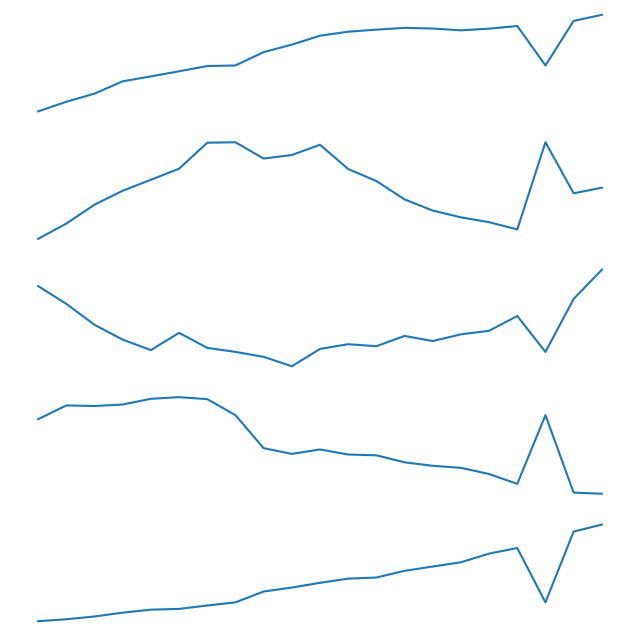

In [ ]:
#plot just the centers here
fig, axs = plt.subplots(5, 1, figsize=(8,8))

for i,c in enumerate(km.cluster_centers_):
    axs[i].plot(c, color = 'tab:blue', alpha = 1.0) # plots the cluster center

    axs[i].set_axis_off()

    # plt.axis('off')

**Figure 5:** K-means clustering with five clusters produced cluster center profiles (km.cluster_centers_). The centroid, or average profile, of a single cluster is shown in each vertically organized subplot. Plotting of cluster centers is done using full opacity (alpha = 1.0) and blue lines (color = 'tab:blue'). While the vertical axis displays scaled or normalized feature values, the horizontal axis most frequently depicts time increments (such as years or months). To highlight each profile's shape and pattern, axes have been concealed. Different temporal dynamics are revealed by the cluster centers; some clusters show consistent trends, while others show noticeable peaks at the conclusion of the series.

**Figure:** Caption

Then plot also the time series that belong to the cluster, overplotting them on the cluster center (cluster center in blue, alpha=1, time series in black, alpha=0.3). The time series in a cluster can be found as km.labe

In [ ]:
# testing km.labels_

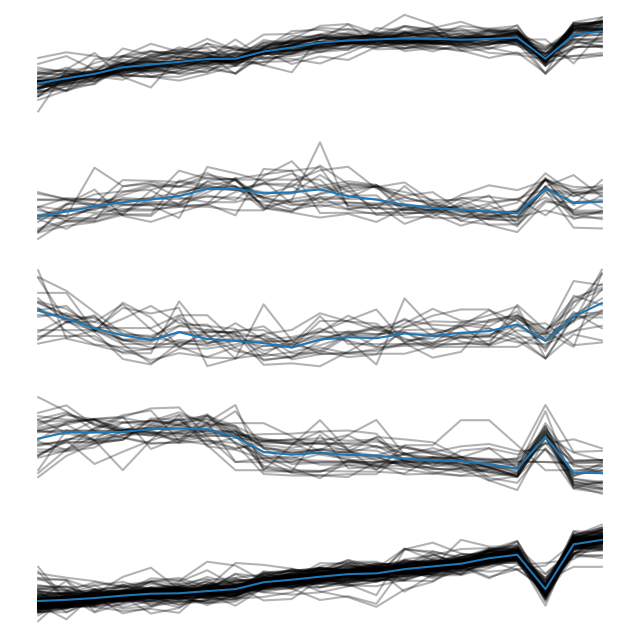

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(8,8))

for i,c in enumerate(km.cluster_centers_):

    # Plot all data points in cluster i
    for sample in vals[km.labels_ == i]:
        axs[i].plot(sample, color='black', alpha=0.3)

    axs[i].plot(c, color = 'tab:blue', alpha = 1.0) # plots the cluster center

    axs[i].set_axis_off()

**Figure 6:** K-means clustering produced time series profiles for each of the five clusters. One cluster is represented by each vertically stacked subplot, which shows the cluster center (km.cluster_centers_) as a blue line with full opacity (alpha = 1.0) signifying the main trend and the individual time series samples (vals[km.labels_ == i]) as black lines with low opacity (alpha = 0.3) to highlight variability. Five rows and one column make up the arrangement, and the axes are concealed (axs[i].set_axis_off()) to draw attention to the pattern shapes. Visual examination reveals that some clusters have strong, recurring patterns with abrupt peaks or dips at the conclusion, while other clusters show more member variability that nonetheless usually fits the profiles of their respective cluster centers.

Map the zipcodes by color according to the cluster center - you can make a single map in 5 color or 5 maps in 1 color each


In [ ]:
#create a dataframe with the cluster id per zipcode
clustersdf = pd.DataFrame()
clustersdf['ZIPCODE'] = df_imputed.index.astype(str)
clustersdf['cluster'] = km.labels_
clustersdf.head()

,ZIPCODE,cluster
0,11436,4
1,11213,4
2,11212,4
3,11225,4
4,11218,4


In [ ]:
#merge it with the geodataframe with the zipcode shapes- I am losing 1 zipcode...
mergednyz = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')
print("length of dataframes:",
      len(mergednyz.ZIPCODE),
      len(np.unique(clustersdf.ZIPCODE)), len(np.unique(nyczipsshp.ZIPCODE)))

length of dataframes: 239 239 248


Note from Yuca: from earlier preprocessing, it seems like we are losing ~9 zipcodes here instead of one (that the professor loses in her homework setup)

/tmp/ipykernel_31/1159410810.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['' * len(ax.get_xticklabels())])


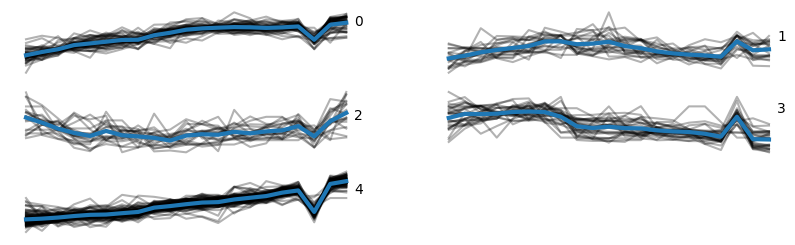

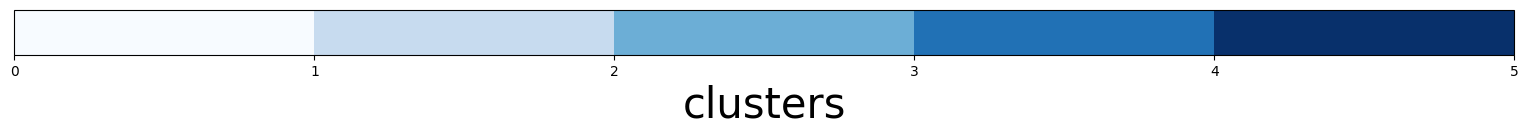

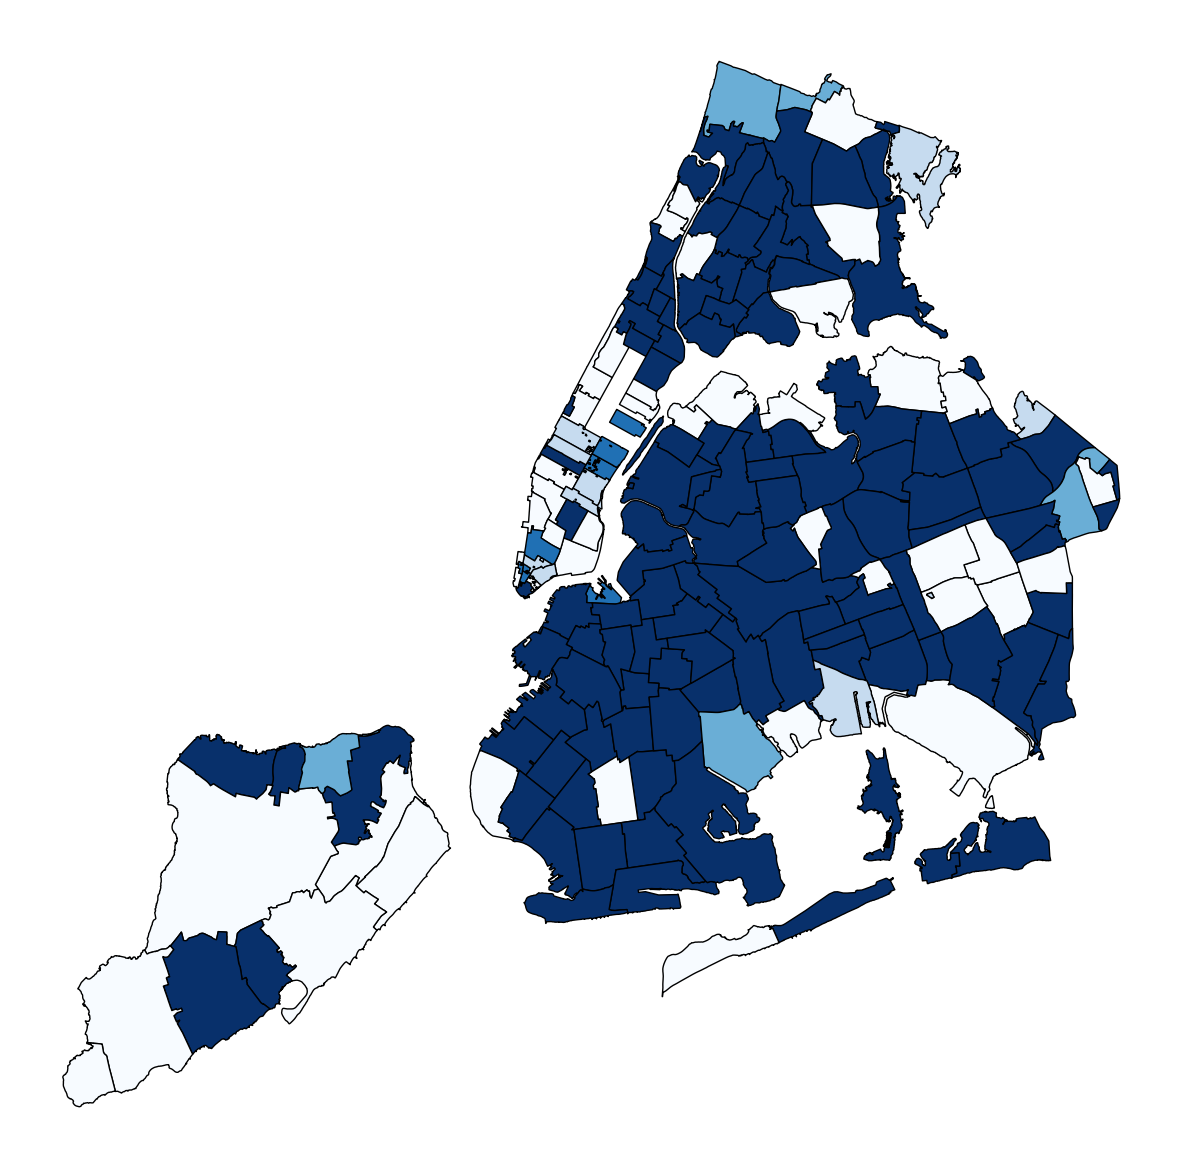

In [ ]:
import matplotlib as mpl
fig = plt.figure(figsize=(10, 5))
for i, Xc in enumerate(km.cluster_centers_):
    ax = fig.add_subplot(5, 2, (i + 1))

    for v in vals[km.labels_ == i]:
        ax.plot(np.arange(1994, 2015, 1), v, 'k-', alpha=0.3)
    ax.text(2014.5, 1, "%d" % i)

    plt.xticks(fontsize=10)
    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    ax.plot(np.arange(1994, 2015, 1), Xc, lw=3)
    plt.grid(False)
    plt.axis('off')
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.Blues
norm = mpl.colors.Normalize(vmin=0, vmax=5)

#adding a color bar to identify the clusters on the map
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.
bounds = range(nc + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = plt.figure(figsize=(15, 15)).add_subplot(111)
mergednyz.plot(column='cluster', cmap='Blues', alpha=1, ax=ax, ec='k')
tmp = ax.axis('off')

**Figure 7:** Results of k-means clustering applied to NYC ZIP code time series data, identifying 5 distinct clusters. (1) Line plots: Individual time series for ZIP codes allocated to a cluster are displayed in each vertically stacked subplot. The cluster center is shown by a thick blue line, while individual series are represented by thin black lines (alpha = 0.3). Clusters (designated 0–4) show clear temporal patterns from 1994–2014. The y-axis most likely shows normalized or standardized feature values, while the x-axis shows the years 1994–2014. (2) Map: A choropleth map of NYC ZIP codes that has been colored by cluster assignment. White areas indicate ZIP codes that are missing or excluded, and lighter to deeper blue hues indicate rising cluster numbers. (3) Colorbar: A horizontal colorbar with distinct tick marks for cluster borders that uses the Blues colormap (mpl.cm.Blues) to map cluster numbers (0–5) to color intensity.

### Figure 3:
cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

Can you parse some business and socioeconomic dynamics from this plot?

create 8 kmeans models with 2-10 cluster centers. put each model in a list

(array([0, 1], dtype=int32), array([185,  54]))
(array([0, 1, 2], dtype=int32), array([ 19,  46, 174]))
(array([0, 1, 2, 3], dtype=int32), array([ 19,  32, 170,  18]))
(array([0, 1, 2, 3, 4], dtype=int32), array([ 50,  21,  19,  28, 121]))
(array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 14,  18,  47,  23, 124,  13]))
(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), array([121,  15,  50,   8,  15,  18,  12]))
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([121,  17,  11,  11,  49,   9,   6,  15]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([73, 15, 19,  5, 15,  7, 79, 10, 16]))


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

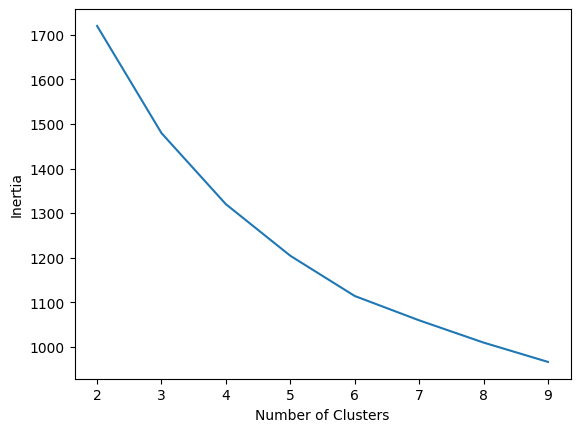

In [ ]:
kms = []

for nc in range(2,10):
  #cluster with kmeans
  kms.append(KMeans(n_clusters=nc, random_state=302).fit(vals))


#each observation in the km object has a label:
#that is the cluster assigned to that observation
for km in kms:
  print(np.unique(km.labels_, return_counts=True))


import pylab as plt
# note from yuca: from documentation website,
# "inertia (float): Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided."
plt.plot(range(2,10), [km.inertia_ for km in kms])
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

**Figure 8:** An elbow plot that assesses the ideal number of clusters for the dataset (vals) while using k-means clustering. The y-axis depicts inertia, which is the sum of squared distances of samples to their closest cluster center, while the x-axis displays the number of clusters examined (between two and nine). From around 1720 at two clusters to about 1110 at six clusters, inertia drops off rapidly. After that, the reduction slows down, suggesting diminishing returns. The "elbow" technique states that choosing five to six clusters provides a fair trade-off between model complexity and fit quality.

**Figure:**

QUESTION: was the number 5 clusters justified by the data? explain

### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

# repeating the exercise using DBSCAN or hyerarchical agglomerative clustring...

In [ ]:
# note from Yuca: trying DBSCAN, you do not specify the number of clusters you want for the way DBSCAN works
# since DBSCAN "finds core samples of high density and expands clusters from them" (from their documentation online)
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

from sklearn.cluster import DBSCAN

"""
epsfloat, default=0.5
The maximum distance between two samples for one to be considered as in the neighborhood of the other.
This is not a maximum bound on the distances of points within a cluster.
This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

min_samplesint, default=5
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.
If min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse.
"""


db = DBSCAN(eps=3.5, min_samples=2).fit(vals)

For eps = 3.5 and min_samples = 2:

In [ ]:
db.core_sample_indices_.shape

(221,)

In [ ]:
print(db.core_sample_indices_)

[  0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  94
  95  96  97  98  99 100 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 189 192 193 194 195 196 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 218 219 224 226 227 228 229 230 231
 232 233 234 236 238]


In [ ]:
db.components_.shape

(221, 21)

In [ ]:
db.labels_.shape

(239,)

In [ ]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,
       -1, -1, -1,  0, -1

[ 0 -1]


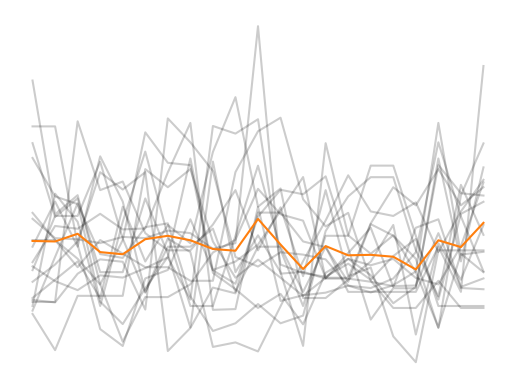

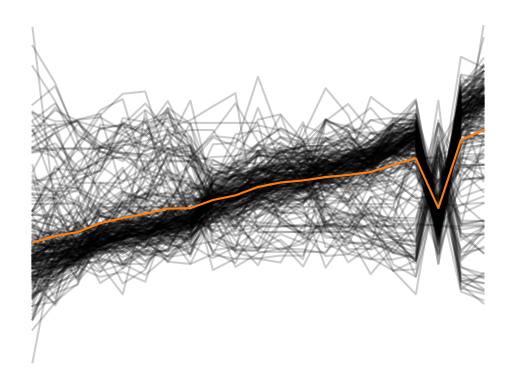

In [ ]:
# Get cluster labels
labels = db.labels_

# Add cluster labels to the DataFrame
vals_pd = pd.DataFrame(vals)
vals_pd['cluster'] = labels
print(vals_pd['cluster'].unique())

# Now you can analyze the clusters as you did with KMeans
# For example:
# Visualize clusters
# ax = vals_pd[vals_pd.cluster == -1].drop("cluster", axis=1).T.plot(legend=False, color="k", alpha=0.2)
for l in range(-1, vals_pd['cluster'].max()+1):
    if len(vals_pd[vals_pd.cluster == l]) == 0:
        continue

    vals_pd[vals_pd.cluster == l].drop("cluster", axis=1).T.plot(legend=False, color='black', alpha=0.2)

    cluster_data = vals_pd[vals_pd.cluster == l].drop("cluster", axis=1)
    cluster_center = cluster_data.mean(axis=0)
    plt.plot(cluster_center.values, color='tab:orange', alpha=1.0)
    plt.axis('off')
    plt.show()

    # cluster_center = vals_pd[vals_pd.cluster == l].mean(axis=0)  # Calculate the "center" of the cluster
    # axs[i].plot(cluster_center, color='tab:orange', alpha=1.0)  # Plot the cluster "center"

**Figure 9:** Results of DBSCAN clustering applied to the time series dataset (vals) are visualized. (1) First plot: Time series allocated to the noise cluster (cluster label = –1), with the orange line showing the mean profile of the noise points and each black line (alpha = 0.2) representing a separate outlier series. There is no discernible common pattern among the noise series, which exhibit considerable fluctuation. (2) The second figure shows time series that are attributed to the main cluster (cluster label = 0). The members of this cluster exhibit considerable structural similarity, as indicated by the many overlapping black lines (alpha = 0.2). The mean cluster center is represented by the orange line, which has a gradual upward trend until a steep decline toward the conclusion. The core cluster is far more coherent and aligned than the noise cluster.

In [ ]:
#create a dataframe with the cluster id per zipcode
clustersdf = pd.DataFrame()
clustersdf['ZIPCODE'] = df_imputed.index.astype(str)
clustersdf['cluster'] = db.labels_
clustersdf.head()

,ZIPCODE,cluster
0,11436,0
1,11213,0
2,11212,0
3,11225,0
4,11218,0


In [ ]:
#merge it with the geodataframe with the zipcode shapes- I am losing 1 zipcode...
mergednyz = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')
print("length of dataframes:",
      len(mergednyz.ZIPCODE),
      len(np.unique(clustersdf.ZIPCODE)), len(np.unique(nyczipsshp.ZIPCODE)))

length of dataframes: 239 239 248


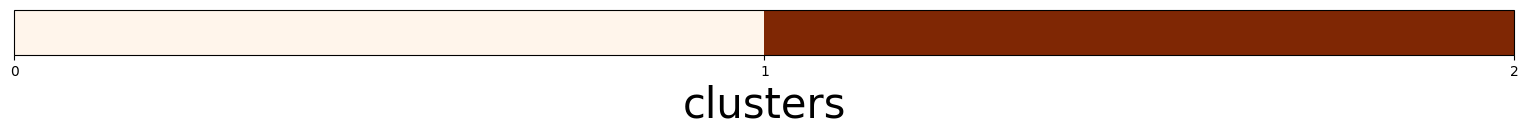

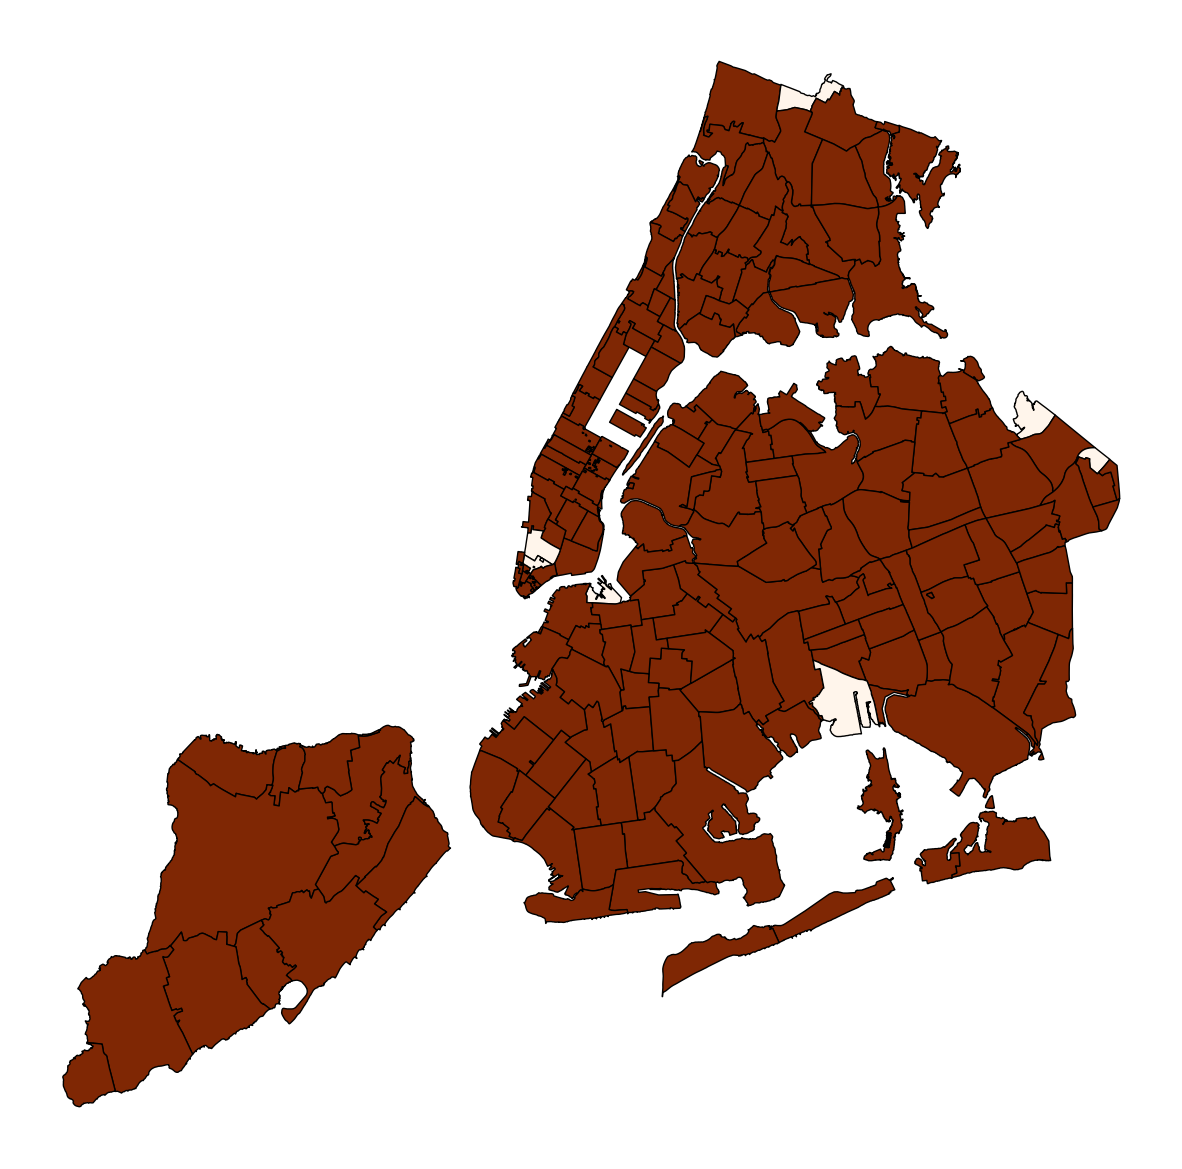

In [ ]:
# import matplotlib as mpl
# fig = plt.figure(figsize=(10, 5))
# for i, Xc in enumerate(km.cluster_centers_):
#     ax = fig.add_subplot(5, 2, (i + 1))

#     for v in vals[km.labels_ == i]:
#         ax.plot(np.arange(1994, 2015, 1), v, 'k-', alpha=0.3)
#     ax.text(2014.5, 1, "%d" % i)

#     plt.xticks(fontsize=10)
#     ax.set_yticklabels(['' * len(ax.get_xticklabels())])
#     ax.plot(np.arange(1994, 2015, 1), Xc, lw=3)
#     plt.grid(False)
#     plt.axis('off')
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.Oranges
norm = mpl.colors.Normalize(vmin=0, vmax=5)

#adding a color bar to identify the clusters on the map
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.
bounds = range(2 + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = plt.figure(figsize=(15, 15)).add_subplot(111)
mergednyz.plot(column='cluster', cmap='Oranges', alpha=1, ax=ax, ec='k')
tmp = ax.axis('off')

**Figure 10:** The DBSCAN clustering results' spatial dispersion in relation to New York City ZIP codes. (1) Cluster colorbar: Using the Oranges colormap (mpl.cm.Oranges), a horizontal colorbar shows cluster labels 0–2; darker brown indicates higher labels (cluster 1), while lighter hues indicate lower cluster labels (cluster 0). With ticks at 0, 1, and 2, the color scale is distinct; nevertheless, cluster 2 doesn't seem to belong to any area on the map. (2) Cluster map: A choropleth map plots cluster assignments throughout New York City. It reveals that nearly every ZIP code region is dark brown (cluster 1), with a few places remaining white, signifying noise points (ZIP codes that DBSCAN did not assign to any cluster).

For eps = 2.5 and min_samples = 2:

[ 0 -1  1  2]


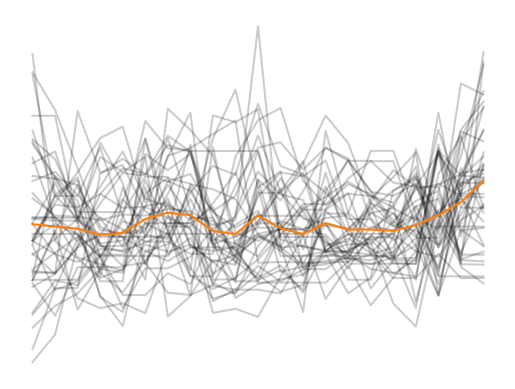

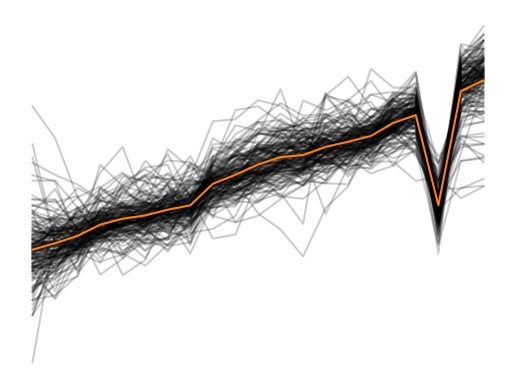

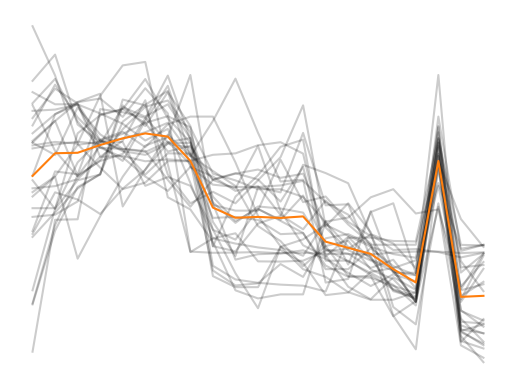

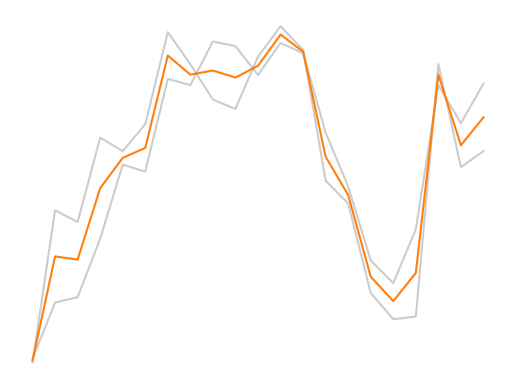

In [ ]:
db = DBSCAN(eps=2.5, min_samples=2).fit(vals)

# Get cluster labels
labels = db.labels_

# Add cluster labels to the DataFrame
vals_pd = pd.DataFrame(vals)
vals_pd['cluster'] = labels
print(vals_pd['cluster'].unique())

# Now you can analyze the clusters as you did with KMeans
# For example:
# Visualize clusters
# ax = vals_pd[vals_pd.cluster == -1].drop("cluster", axis=1).T.plot(legend=False, color="k", alpha=0.2)
for l in range(-1, vals_pd['cluster'].max()+1):
    if len(vals_pd[vals_pd.cluster == l]) == 0:
        continue

    vals_pd[vals_pd.cluster == l].drop("cluster", axis=1).T.plot(legend=False, color='black', alpha=0.2)

    cluster_data = vals_pd[vals_pd.cluster == l].drop("cluster", axis=1)
    cluster_center = cluster_data.mean(axis=0)
    plt.plot(cluster_center.values, color='tab:orange', alpha=1.0)
    plt.axis('off')
    plt.show()

    # cluster_center = vals_pd[vals_pd.cluster == l].mean(axis=0)  # Calculate the "center" of the cluster
    # axs[i].plot(cluster_center, color='tab:orange', alpha=1.0)  # Plot the cluster "center"

Fugure 11: Four separate groups are seen in this visualization of the DBSCAN clustering findings applied to the time series dataset (vals). (1) Cluster 0: There is no discernible worldwide trend, as seen by the great variability of the individual time series (gray lines, alpha = 0.2) and the cluster center (orange line), which stays comparatively flat with only slight oscillations. (2) Cluster 1: The orange cluster center line indicates general growth tendency, with a large number of closely aligned time series displaying a consistent ascending trend with a severe decrease near the conclusion. (3) Cluster 2: This cluster exhibits greater variability than Cluster 1 and often shows a declining trend over time, with the orange centerline showing a steady decrease and a noticeable peak before to a final drop. (4) Cluster 3: A small cluster comprising a few sharply varying time series, with the orange centerline capturing volatile ups and downs, suggesting a minority group exhibiting atypical temporal patterns.

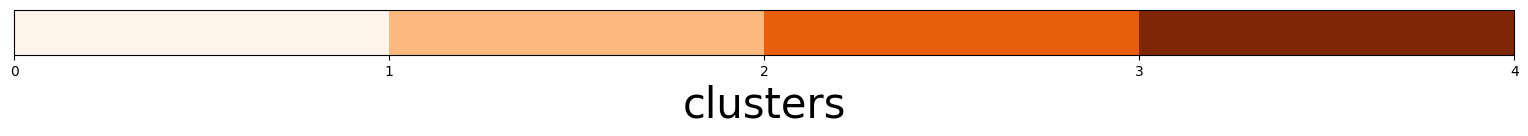

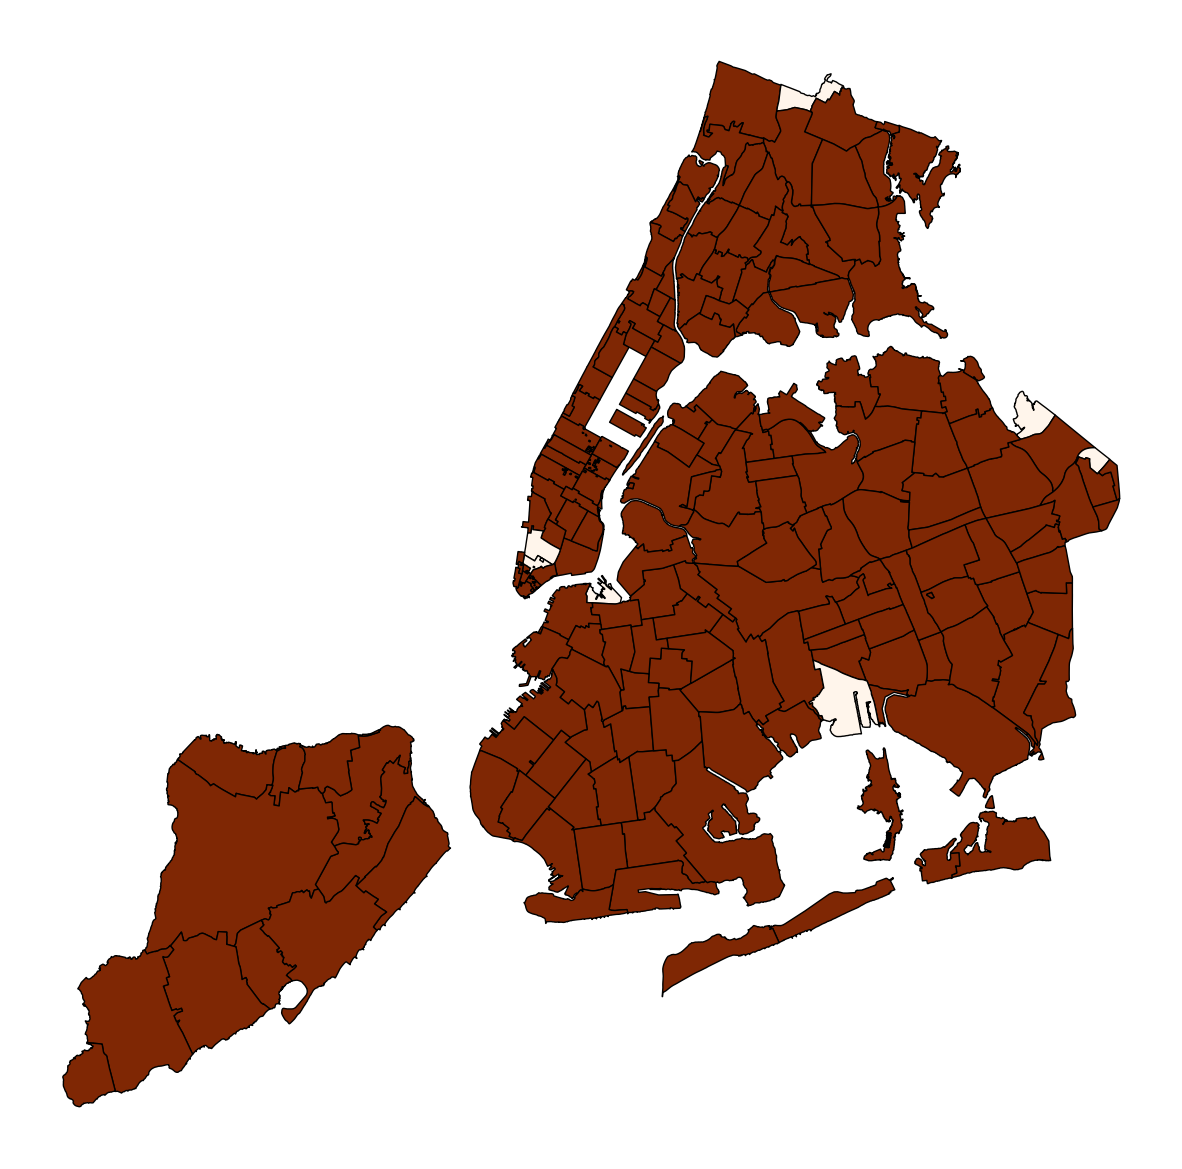

In [ ]:
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.Oranges
norm = mpl.colors.Normalize(vmin=0, vmax=5)

bounds = range(4 + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = plt.figure(figsize=(15, 15)).add_subplot(111)
mergednyz.plot(column='cluster', cmap='Oranges', alpha=1, ax=ax, ec='k')
tmp = ax.axis('off')

**Figure 12:** Five separate clusters were identified by applying the spatial distribution of DBSCAN clustering results to ZIP codes in New York City. (1) Cluster colorbar: Using the Oranges colormap (mpl.cm.Oranges), a horizontal colorbar shows cluster labels from 0 to 4. The labels span from extremely light orange (cluster 0) to dark brown (cluster 4), with a distinct five-category scale. (2) Cluster map: Each NYC ZIP code's cluster assignment is seen using a choropleth map, which reveals that the majority of ZIP codes are shaded dark brown, which corresponds to cluster 4. Only a small number of ZIP codes have lighter colors, which stand for clusters 0, 1, 2, and 3, while other parts are white, which most likely indicate unclustered or missing ZIP codes.

For eps = 3.5 and min_samples = 1:

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


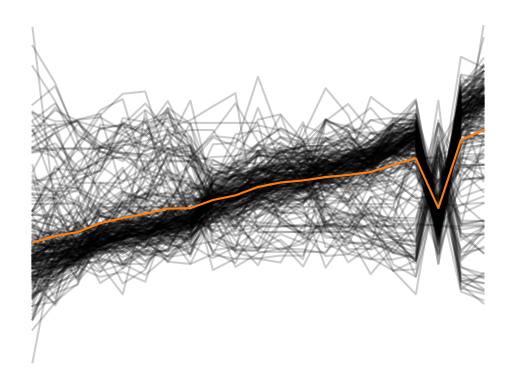

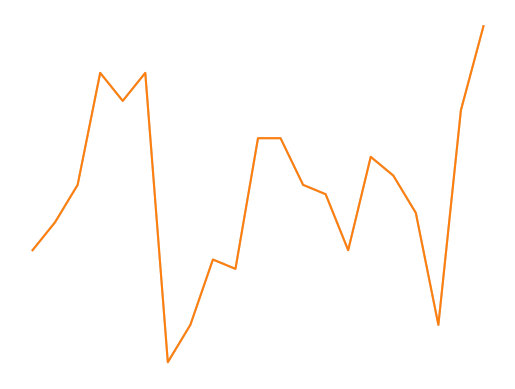

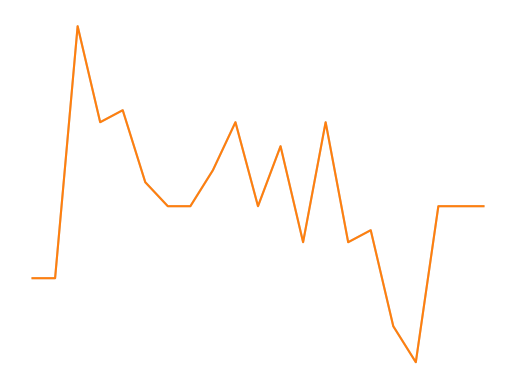

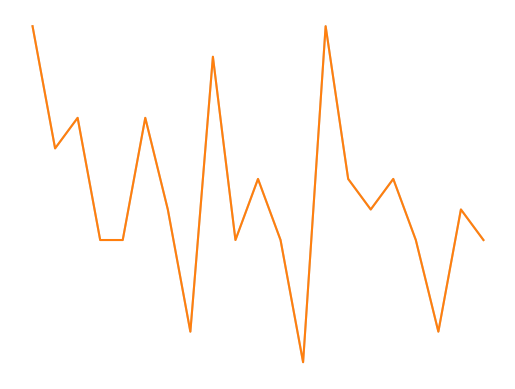

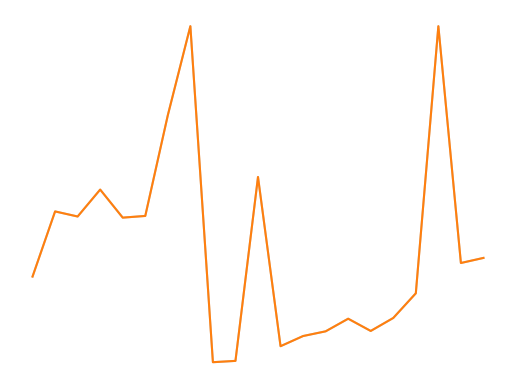

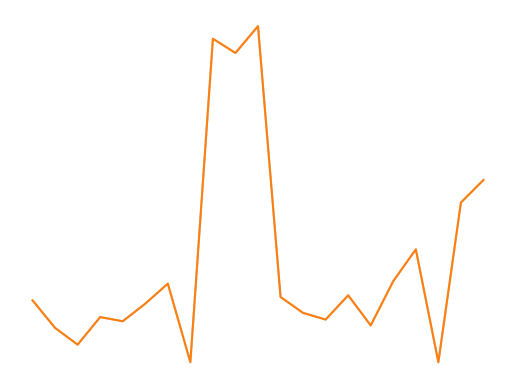

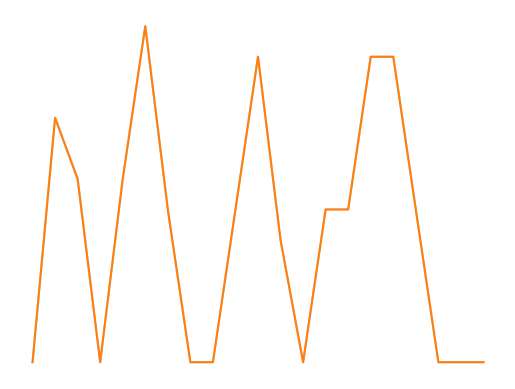

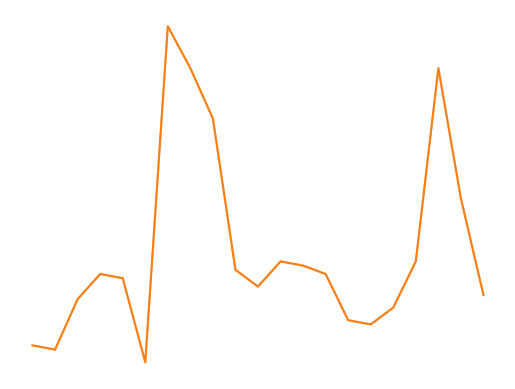

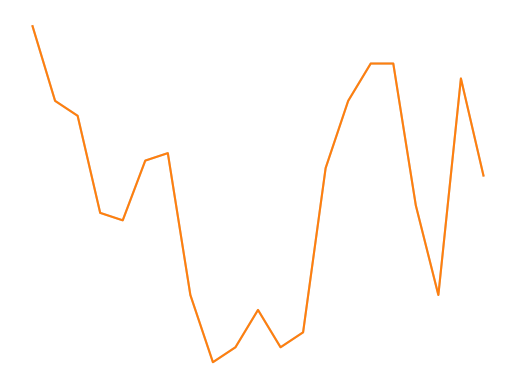

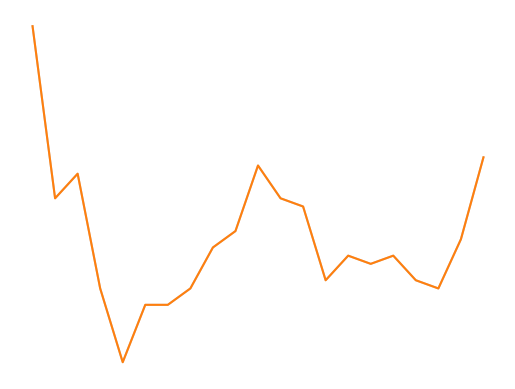

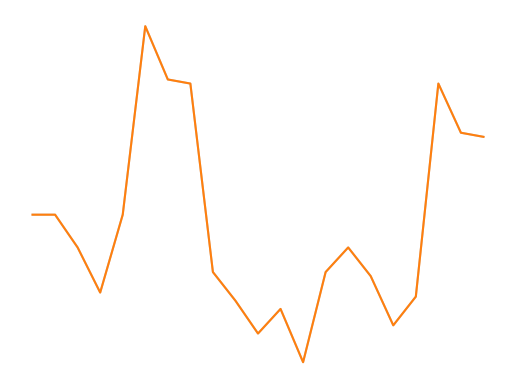

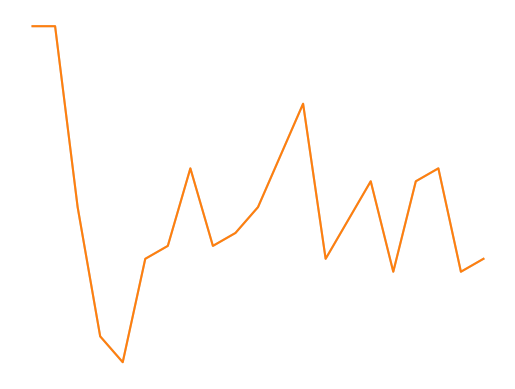

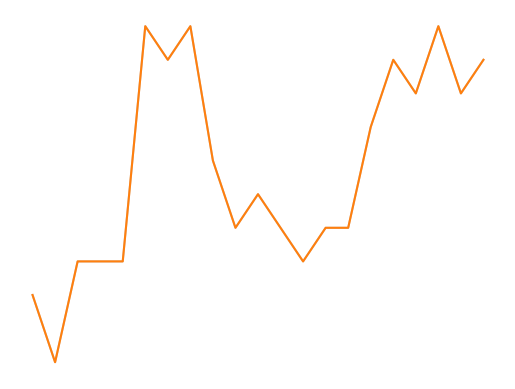

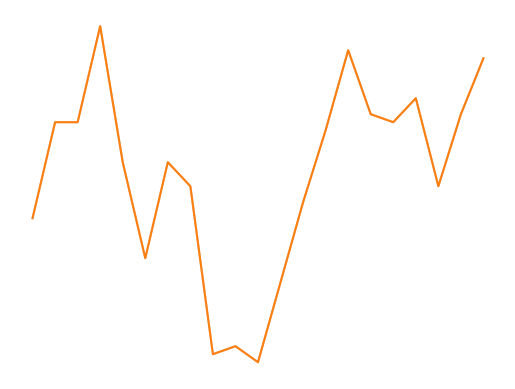

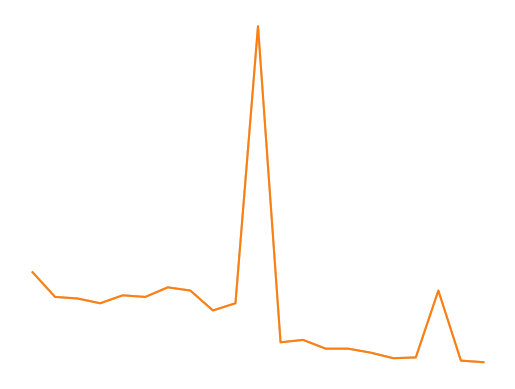

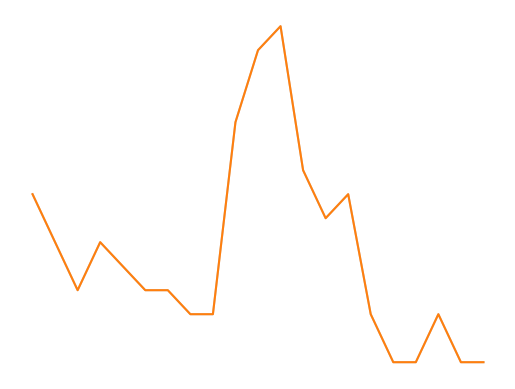

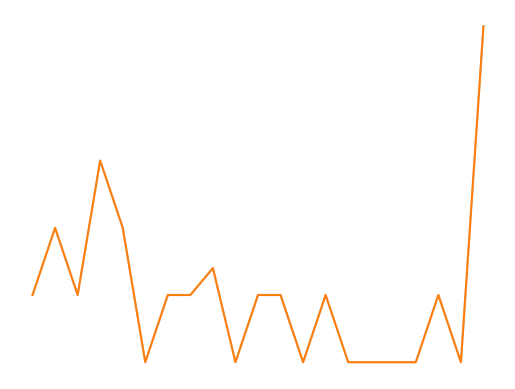

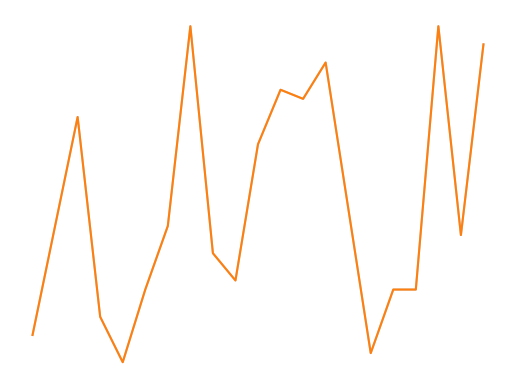

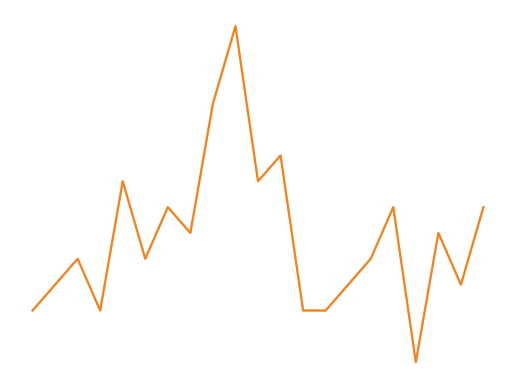

In [ ]:
db = DBSCAN(eps=3.5, min_samples=1).fit(vals)

# Get cluster labels
labels = db.labels_

# Add cluster labels to the DataFrame
vals_pd = pd.DataFrame(vals)
vals_pd['cluster'] = labels
print(vals_pd['cluster'].unique())

# Now you can analyze the clusters as you did with KMeans
# For example:
# Visualize clusters
# ax = vals_pd[vals_pd.cluster == -1].drop("cluster", axis=1).T.plot(legend=False, color="k", alpha=0.2)
for l in range(-1, vals_pd['cluster'].max()+1):
    if len(vals_pd[vals_pd.cluster == l]) == 0:
        continue

    vals_pd[vals_pd.cluster == l].drop("cluster", axis=1).T.plot(legend=False, color='black', alpha=0.2)

    cluster_data = vals_pd[vals_pd.cluster == l].drop("cluster", axis=1)
    cluster_center = cluster_data.mean(axis=0)
    plt.plot(cluster_center.values, color='tab:orange', alpha=1.0)
    plt.axis('off')
    plt.show()

    # cluster_center = vals_pd[vals_pd.cluster == l].mean(axis=0)  # Calculate the "center" of the cluster
    # axs[i].plot(cluster_center, color='tab:orange', alpha=1.0)  # Plot the cluster "center"

**Figure 12:** Applying the DBSCAN clustering result to the time series dataset (vals) with epsilon = 3.5 and min_samples = 1. No noise points are found, and all time series are grouped into a single dominant cluster. An individual time series is represented by each black line (alpha = 0.2), and the cluster center—which is determined by taking the mean profile of all the series—is displayed by the orange line. Over time, the centerline shows a distinct ascending trend, which is followed by a steep decline near the end. Strong cohesiveness and similarity between the time series are indicated by the close concentration of black lines surrounding the centerline.

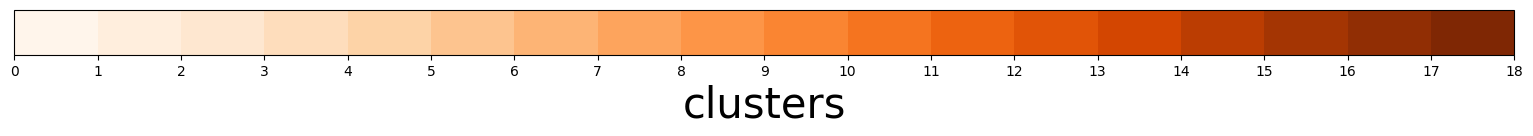

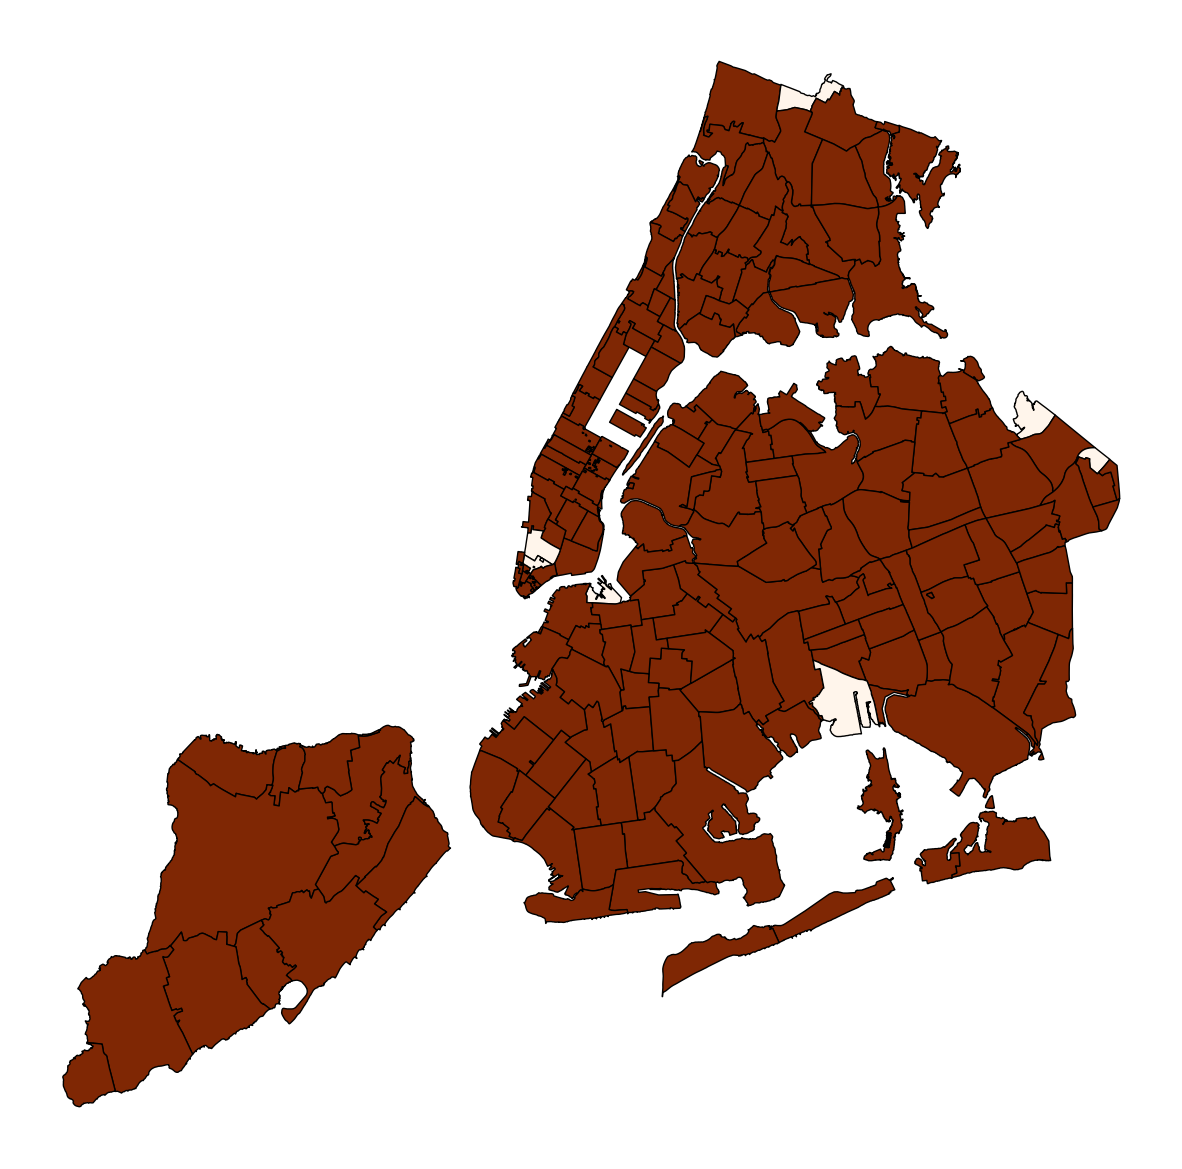

In [ ]:
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.Oranges
norm = mpl.colors.Normalize(vmin=0, vmax=5)

bounds = range(18 + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = plt.figure(figsize=(15, 15)).add_subplot(111)
mergednyz.plot(column='cluster', cmap='Oranges', alpha=1, ax=ax, ec='k')
tmp = ax.axis('off')

**Figure 13:** 19 clusters (cluster IDs 0 to 18) were produced when the DBSCAN clustering results were applied to ZIP codes in New York City. (1) Cluster colorbar: Using the Oranges colormap, which changes from light orange (cluster 0) to dark brown (cluster 18), a horizontal colorbar shows distinct cluster names from 0 to 18. (2) Cluster map: The majority of ZIP codes are shaded in darker hues, signifying assignment to higher-numbered clusters, on a choropleth map, which shows the spatial distribution of ZIP code clusters around New York City. Some ZIP codes are still white, indicating that DBSCAN either did not cluster them or labeled them as noise.

### Figure 9:
As figures 3, 5, 7 for hierarchical agglomerative clustering in 7 clusters, with smoothed time series

# If you want to use agglomerative clustering

In [ ]:
....

SyntaxError: invalid syntax (1805539695.py, line 1)

### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

In [ ]:
import scipy.cluster as scp
fig = pl.figure(figsize=(20,10), dpi=150)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = zipcodes,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)


In [ ]:
!pwd